In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv('Advertising.csv')
tv = dataset['TV']
radio = dataset['Radio']
newpaper = dataset['Newspaper']
sales = dataset['Sales']

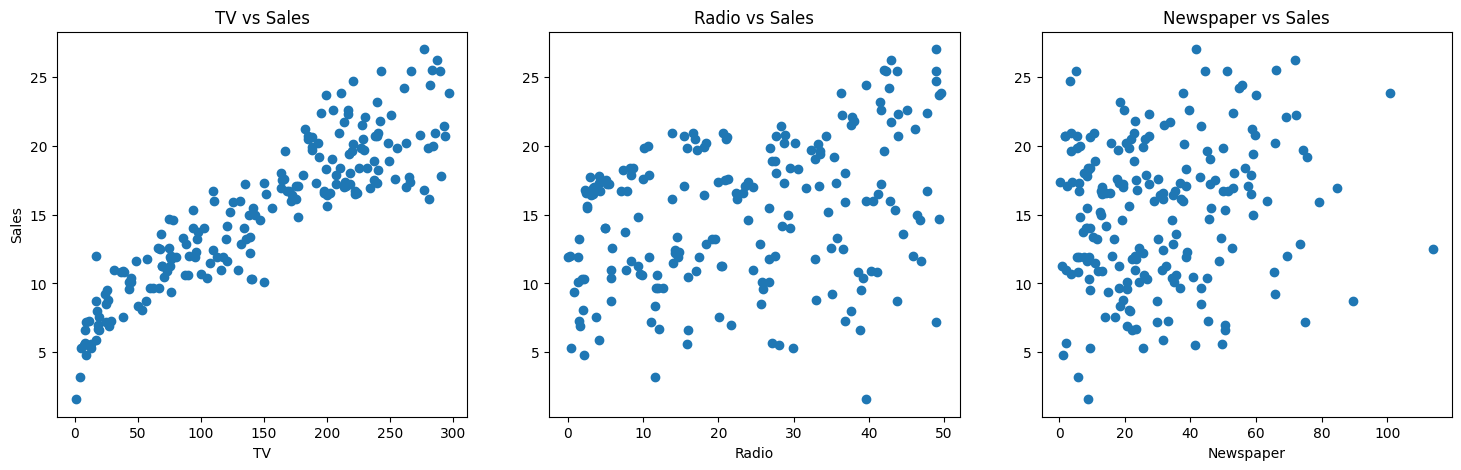

In [4]:
# Visualisation initiale pour comprendre les données
plt.figure(figsize=(18, 5))

# TV vs Sales
plt.subplot(1, 3, 1)
plt.scatter(tv, sales)
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
plt.scatter(radio, sales)
plt.title('Radio vs Sales')
plt.xlabel('Radio')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
plt.scatter(newpaper, sales)
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')

plt.show()

In [5]:
y=dataset.Sales.values.reshape(-1,1)

In [6]:
X = np.vstack((tv, radio, newpaper)).T
# X=dataset[['TV','Radio','Newspaper']].values
X.shape

(200, 3)

In [7]:
# x_train,x_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [8]:
X = np.hstack((X,np.ones((X.shape[0],1))))
X.shape

(200, 4)

### Theta

In [9]:
theta = np.random.randn(4, 1)
theta

array([[0.64078549],
       [1.94375966],
       [0.08199608],
       [2.61804895]])

## Modèle Linéaire

In [10]:
def model(X,theta):
    return X.dot(theta)

## Fonction Cout : Erreur Quadratique Moyenne

In [11]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [12]:
cost_function(X, y, theta)

10107.333956920185

### Gradients et Descente de Gradient

In [13]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [14]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [15]:
n_iterations = 1000000
learning_rate = 0.00004

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [16]:
predictions = model(X, theta_final)
theta_final

array([[5.44619157e-02],
       [1.07069008e-01],
       [3.71546224e-04],
       [4.61921559e+00]])

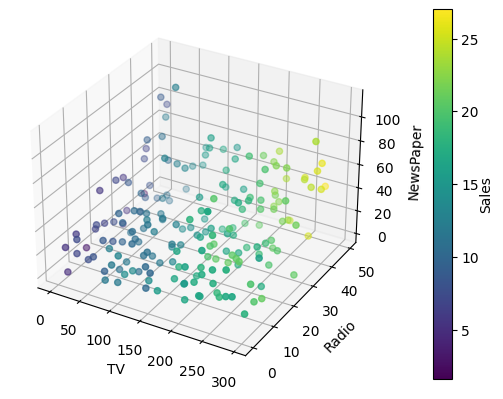

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Utiliser la couleur pour représenter la variable "Sales"
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')

# Ajouter une barre de couleur
cbar =plt.colorbar(sc, label='Sales')
cbar.ax.yaxis.set_label_coords(2.5, 0.5)
# Afficher les noms des axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('NewsPaper')
plt.subplots_adjust(right=1.8)
plt.show()

### Courbe d'apprentissage

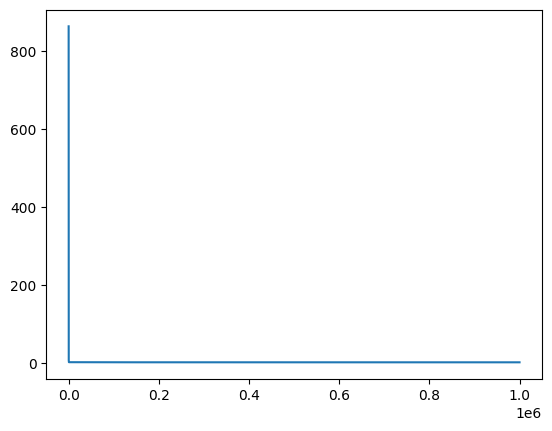

In [18]:
plt.plot(range(n_iterations), cost_history)
plt.show()

### Evaluation du modèle

In [19]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [21]:
lrm = coef_determination(y, predictions)
lrm


0.9025911064829665